In [1]:
# step26

In [2]:
%%bash
brew install graphviz

==> Auto-updated Homebrew!
Updated 1 tap (homebrew/core).
==> New Formulae
claws-mail
detach
duktape
earthly
fargatecli
fcct
kumactl
oha
openfast
redo
vlmcsd
==> Updated Formulae
abcl
abcmidi
ace
acpica
adios2
algol68g
alot
angular-cli
ansible
ansible@2.8
artifactory
asciidoctorj
asio
ask-cli
astrometry-net
atlantis
audacious
aws-cdk
aws-elasticbeanstalk
awscli
azcopy
azure-cli
azure-storage-cpp
b3sum
babel
balena-cli
ballerina
bde
binaryen
bison
bitrise
blackbox
blitz
bluepill
bochs
buildifier
calabash
cfengine
cfn-lint
cglm
cgoban
charm-tools
chronograf
clamav
clib
cmake
cmark
cmark-gfm
conserver
consul-template
contentful-cli
ctemplate
curl
curl-openssl
darcs
datetime-fortran
davix
dbmate
deno
detox
dhall-bash
diamond
diff-pdf
dnstwist
doctl
docutils
dolt
dosbox-x
dxpy
easyrpg-player
efl
ejabberd
ejdb
elasticsearch
emscripten
envconsul
erlang
erlang@21
exploitdb
faas-cli
fasttext
faudio
fb-client
ffmpeg
ffmpeg@2.8
fibjs
filebeat
fish
fluent-bit
flyway
folly
fonttools
fselect
futhark

Updating Homebrew...
Error: graphviz 2.42.3 is already installed
To upgrade to 2.44.0, run `brew upgrade graphviz`.


CalledProcessError: Command 'b'brew install graphviz\n'' returned non-zero exit status 1.

In [3]:
%%bash
dot -V

dot - graphviz version 2.42.3 (20191010.1750)


In [3]:
# 26.2
import numpy as np
from dezero.utils import _dot_var
from dezero import Variable

x = Variable(np.random.randn(100))
x.name = 'x'
print(_dot_var(x))
print(_dot_var(x, verbose=True))

4695527776 [label="x", color=orange, style=filled]

4695527776 [label="x: (100,) float64", color=orange, style=filled]



In [1]:
import numpy as np
from dezero.utils import _dot_func
from dezero import Variable

x0 = Variable(np.array(1.0))
x1 = Variable(np.array(1.0))
y = x0 + x1
print(_dot_func(y.creator))

4533455504 [label="Add", color=lightblue, style=filled, shape=box]
4648351336 -> 4533455504
4537051064 -> 4533455504
4533455504 -> 4537930920



In [1]:
import numpy as np
from dezero.utils import get_dot_graph
from dezero import Variable

x0 = Variable(np.array(1.0))
x1 = Variable(np.array(1.0))
y = x0 + x1
print(get_dot_graph(y))

digraph g {
4416275456 [label="() float64", color=orange, style=filled]
4411796000 [label="Add", color=lightblue, style=filled, shape=box]
4627375552 -> 4411796000
4415391504 -> 4411796000
4411796000 -> 4416275456
4627375552 [label="() float64", color=orange, style=filled]
4415391504 [label="() float64", color=orange, style=filled]
}


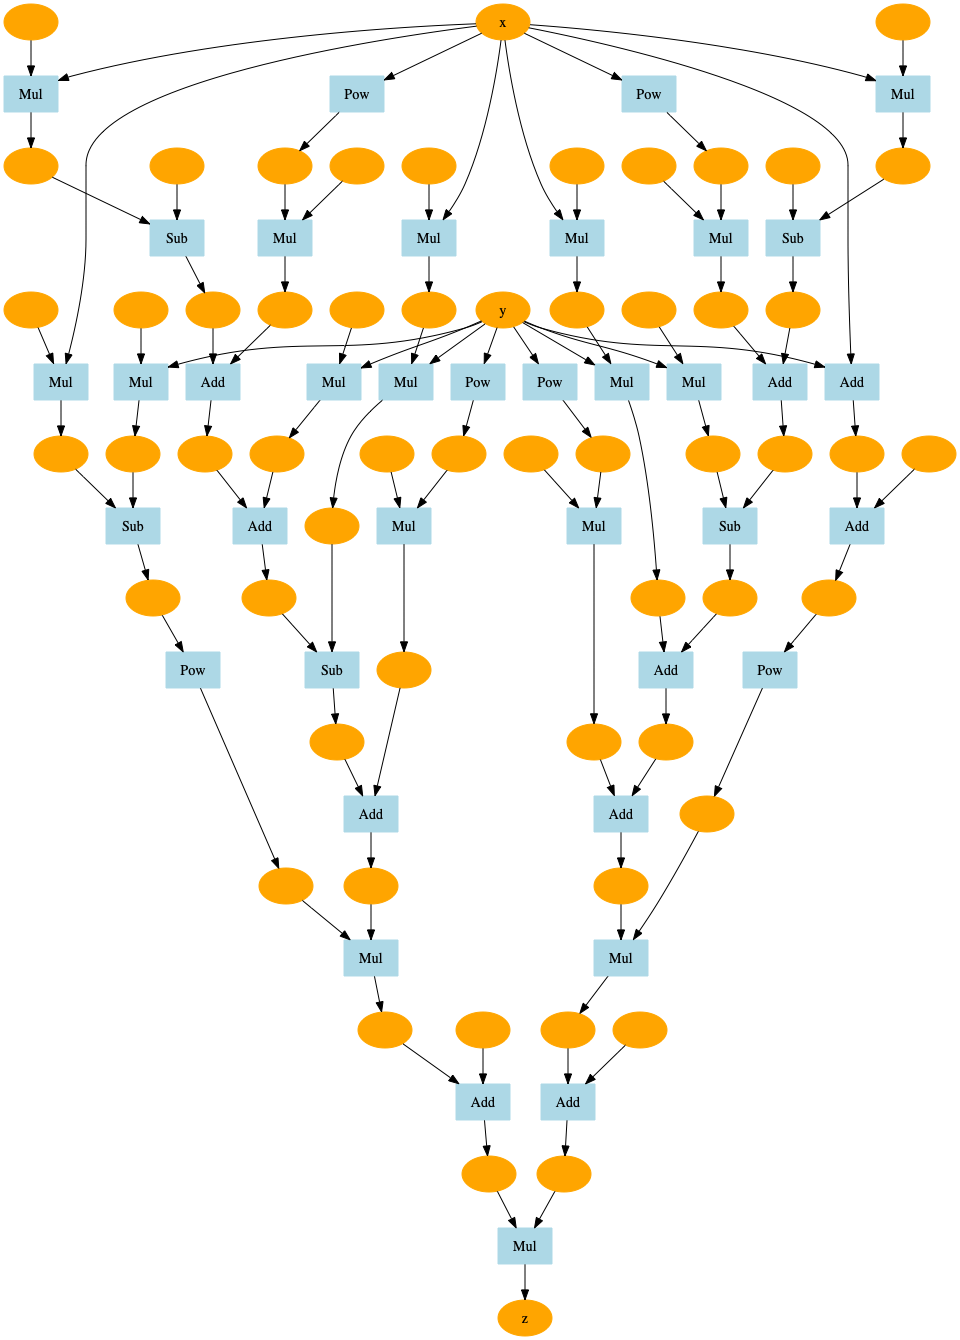

In [1]:
# 26.4
import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph

def goldstein(x, y):
    z = (1 + (x + y + 1)**2 * (19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2)) * \
        (30 + (2*x - 3*y)**2 * (18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2))
    return z

x = Variable(np.array(1.0))
y = Variable(np.array(1.0))
z = goldstein(x, y)
z.backward()

x.name = 'x'
y.name = 'y'
z.name = 'z'

plot_dot_graph(z, verbose=False, to_file='goldstein.png')

In [14]:
# step27

import numpy as np
from dezero import Variable
from steps.step27 import sin

x = Variable(np.array(np.pi/4))
y = sin(x)
y.backward()

print(y.data)
print(x.grad)

0.7071067811865475
0.7071067811865476


In [17]:
# 27.3
import math

def my_sin(x, threshold=0.0001):
    y = 0
    for i in range(1000):
        c = (-1) ** i / math.factorial(2 * i + 1)
        t = c * x ** (2 * i + 1)
        y = y + t
        if abs(t.data) < threshold:
            break
    return y

In [18]:
x = Variable(np.array(np.pi/4))
y = my_sin(x)
y.backward()
print(y.data)
print(x.grad)

0.7071064695751781
0.7071032148228457


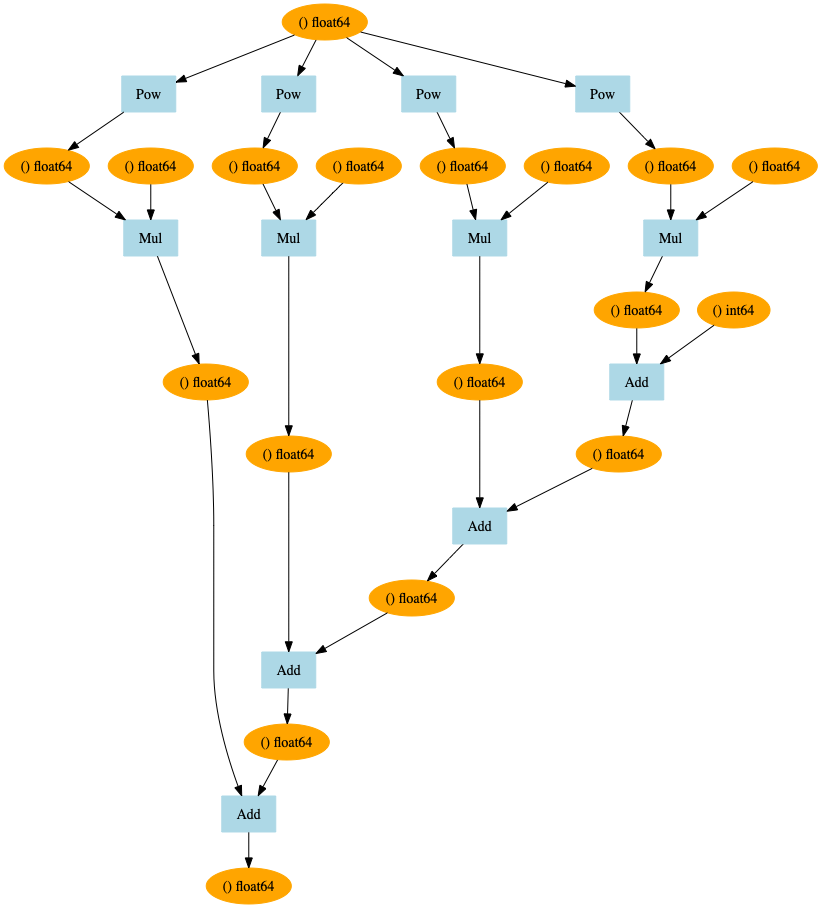

In [19]:
from dezero.utils import plot_dot_graph
plot_dot_graph(y)

In [20]:
# step28
# 28.2
import numpy as np
from dezero import Variable

def rosenblock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (x0 -1) ** 2
    return y

x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

y = rosenblock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

-2.0 400.0


In [21]:
# 28.3
import numpy as np
from dezero import Variable

x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))
lr = 0.001 # 学習率
iters = 1000 # 繰り返す回数

for i in range(iters):
    print(x0, x1)
    
    y = rosenblock(x0, x1)
    x0.cleargrad()
    x1.cleargrad()
    y.backward()
    
    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad

variable(0.0) variable(2.0)
variable(0.002) variable(1.6)
variable(0.0052759968) variable(1.2800008)
variable(0.009966698110960038) variable(1.0240062072284468)
variable(0.01602875299014943) variable(0.8192248327970044)
variable(0.02324750923068761) variable(0.6554312504220874)
variable(0.031290846214210376) variable(0.5244530896747561)
variable(0.039780241951514035) variable(0.41975829515116514)
variable(0.04835473570612382) variable(0.3361231296508763)
variable(0.05671405943493354) variable(0.26936613981374286)
variable(0.06463840226323121) variable(0.2161362087585121)
variable(0.07198937826156711) variable(0.17374459161623834)
variable(0.07869927242171229) variable(0.14003216740948807)
variable(0.08475507379959696) variable(0.11326444902353183)
variable(0.0901819257435144) variable(0.0920482437257805)
variable(0.09502862514911821) variable(0.07526515092678615)
variable(0.09935624532071949) variable(0.062018208660975245)
variable(0.10322996680416148) variable(0.05158889962562639)
var

variable(0.5885287750600148) variable(0.3443315732630853)
variable(0.5888727620084186) variable(0.3447384824251965)
variable(0.589216228206542) variable(0.34514501190724195)
variable(0.5895591750132521) variable(0.3455511622421823)
variable(0.5899016037822225) variable(0.3459569339622071)
variable(0.5902435158619582) variable(0.3463623275987333)
variable(0.5905849125958217) variable(0.3467673436824038)
variable(0.5909257953220585) variable(0.3471719827430859)
variable(0.5912661653738225) variable(0.3475762453098702)
variable(0.5916060240792014) variable(0.347980131911069)
variable(0.5919453727612418) variable(0.3483836430742153)
variable(0.5922842127379742) variable(0.34878677932606134)
variable(0.5926225453224375) variable(0.34918954119257745)
variable(0.5929603718227042) variable(0.3495919291989509)
variable(0.5932976935419044) variable(0.34999394386958466)
variable(0.5936345117782508) variable(0.3503955857280964)
variable(0.5939708278250622) variable(0.3507968552973176)
variable(0.5

In [2]:
# step29
import numpy as np
from dezero import Variable

def f(x):
    y = x ** 4 - 2 * x ** 2
    return y

def gx2(x):
    return 12 * x ** 2 - 4

x = Variable(np.array(2.0))
iters = 10

for i in range(iters):
    print(i, x)
    y = f(x)
    x.cleargrad()
    
    y.backward()
    x.data -= x.grad / gx2(x.data)

0 variable(2.0)
1 variable(1.4545454545454546)
2 variable(1.1510467893775467)
3 variable(1.0253259289766978)
4 variable(1.0009084519430513)
5 variable(1.0000012353089454)
6 variable(1.000000000002289)
7 variable(1.0)
8 variable(1.0)
9 variable(1.0)


In [1]:
# step33
import numpy as np
from dezero import Variable

def f(x):
    # x^4 - 2x^2
    # 1階微分 4x^3 - 4x
    y = x ** 4 - 2 * x ** 2
    return y

    
x = Variable(np.array(2.0), name='x')
y = f(x)
y.name = 'y'
y.backward(create_graph=True)
print(x.grad)

gx = x.grad
gx.name = 'gx'
x.cleargrad()
gx.backward(create_graph=True)
print(x.grad)

variable(24.0)
variable(44.0)


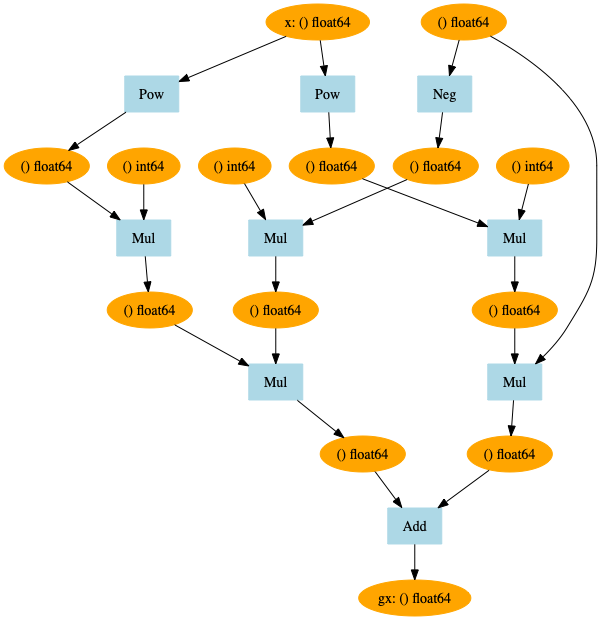

In [8]:
from dezero.utils import plot_dot_graph
plot_dot_graph(gx)

In [9]:
# 33.2
import numpy as np
from dezero import Variable

def f(x):
    # x^4 - 2x^2
    # 1階微分 4x^3 - 4x
    y = x ** 4 - 2 * x ** 2
    return y

x = Variable(np.array(2.0))
iters = 10
for i in range(iters):
    print(i, x)
    y = f(x)
    x.cleargrad()
    y.backward(create_graph=True)
    
    gx = x.grad
    x.cleargrad()
    gx.backward()
    gx2 = x.grad
    
    x.data -= gx.data / gx2.data


0 variable(2.0)
Sub
(variable(1.0), variable(-1.0))
Mul
(variable(-2.0), variable(-4.0))
Pow
variable(-8.0)
Pow
variable(32.0)
Add
(variable(1.0), variable(1.0))
Mul
(variable(1.0), variable(32.0))
Mul
(variable(-2.0), variable(4.0))
Mul
(variable(8.0), variable(-4.0))
Mul
(variable(-4.0), variable(-4.0))
Mul
(variable(4.0), variable(8.0))
Pow
variable(48.0)
Pow
variable(-4.0)
Neg
variable(-8.0)
1 variable(1.4545454545454546)
Sub
(variable(1.0), variable(-1.0))
Mul
(variable(-2.0), variable(-2.115702479338843))
Pow
variable(-5.818181818181818)
Pow
variable(12.30954169797145)
Add
(variable(1.0), variable(1.0))
Mul
(variable(1.0), variable(12.30954169797145))
Mul
(variable(-2.0), variable(2.909090909090909))
Mul
(variable(5.818181818181818), variable(-2.909090909090909))
Mul
(variable(-4.0), variable(-2.909090909090909))
Mul
(variable(4.0), variable(3.0773854244928627))
Pow
variable(25.388429752066116)
Pow
variable(-4.0)
Neg
variable(-5.818181818181818)
2 variable(1.1510467893775467)
Sub

In [5]:
# step34
# 34.3

import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array(1.0))
y = F.sin(x)
y.backward(create_graph=True)

for i in range(3):
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)
    print(f'{i+1}階微分 : {x.grad}') # 高階微分

1階微分 : variable(-0.8414709848078965)
2階微分 : variable(-0.5403023058681398)
3階微分 : variable(0.8414709848078965)


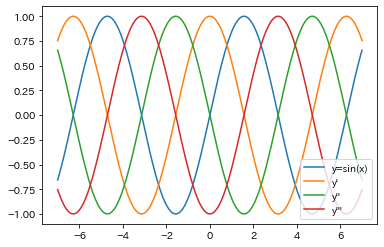

In [10]:
# step34
# 34.3

import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F

x = Variable(np.linspace(-7, 7, 200))
y = F.sin(x)
y.backward(create_graph=True)

logs = [y.data.flatten()]

for i in range(3):
    logs.append(x.grad.data.flatten())
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)

# plot graph
labels = ["y=sin(x)", "y'", "y''", "y'''"]
for i, v in enumerate(logs):
    plt.plot(x.data, logs[i], label=labels[i])
plt.legend(loc='lower right')
plt.show()

In [5]:
# step35

# 35.3

import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph
import dezero.functions as F

x = Variable(np.array(1.0))
y = F.tanh(x)
x.name = 'x'
y.name = 'y'

y.backward(create_graph=True)
iters = 5

for i in range(iters):
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)
    
gx = x.grad
gx.name = 'gx' + str(iters+1)
plot_dot_graph(gx, verbose=False, to_file='tanh.png')